In [150]:
import pandas as pd
import numpy as np

# Librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns


# librerias de machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [89]:
df = pd.read_csv('CrabAgePrediction.csv')
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [65]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [77]:
df.Sex.unique().tolist()

['F', 'M', 'I']

In [78]:
df.Sex.value_counts()

Sex
M    1435
I    1233
F    1225
Name: count, dtype: int64

In [110]:
df1 = df
df1 = pd.get_dummies(data = df, columns = ['Sex'])
df1.head()
df1.dtypes

Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
Sex_F                bool
Sex_I                bool
Sex_M                bool
dtype: object

# Volver variables numericas a los variables de sexo del cangrejo

In [122]:
def replace_bool(df):
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].replace({True: 1, False: 0})
replace_bool(df1)
df1.head()

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.747181    9      1      0      0  
1      1.559222    6      0      0      1  
2      2.764076    6      0      1      0  
3      5.244657   10      1      0      0  
4      1.700970    6      0      1      0

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 non-null   float64
 1   Diameter        3893 non-null   float64
 2   Height          3893 non-null   float64
 3   Weight          3893 non-null   float64
 4   Shucked Weight  3893 non-null   float64
 5   Viscera Weight  3893 non-null   float64
 6   Shell Weight    3893 non-null   float64
 7   Age             3893 non-null   int64  
 8   Sex_F           3893 non-null   int64  
 9   Sex_I           3893 non-null   int64  
 10  Sex_M           3893 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 334.7 KB


# Encontrar correlacion entre las variables

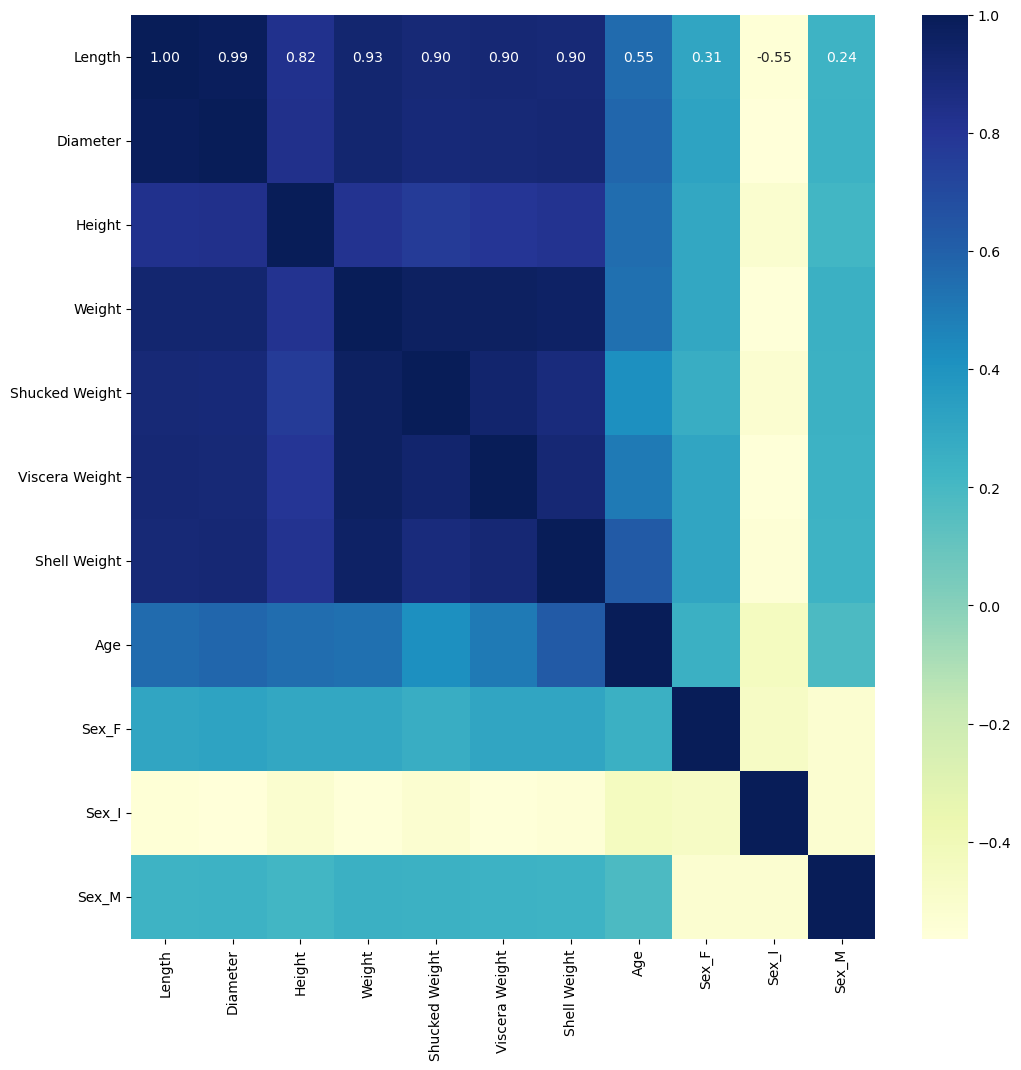

In [129]:
plt.figure(figsize = (12, 12)) 
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [104]:
correlations = df1.corr()['Age'].drop('Age').sort_values(ascending=False)
print(correlations)

Shell Weight      0.625195
Diameter          0.573844
Length            0.554973
Height            0.551956
Weight            0.538819
Viscera Weight    0.501328
Shucked Weight    0.418760
Sex_F             0.249282
Sex_M             0.182339
Sex_I            -0.437937
Name: Age, dtype: float64


# Dividir el conjunto de datos

In [133]:
X = ['Shell Weight', 'Diameter', 'Length', 'Height', 'Weight', 'Viscera Weight', 'Shucked Weight', 'Sex_F', 'Sex_M', 'Sex_I']
X = df1[X]

In [134]:
y = df1['Age']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Estandarizar el conjunto de datos

In [137]:
ss = StandardScaler()
ss

StandardScaler()

In [140]:
X_train = ss.fit_transform(X_train)

## Creación del modelo de regression lineal

In [144]:
# crear un modelo de regression lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Hacer predicciones

In [148]:
X_test = ss.fit_transform(X_test)
edad_de_cangrejos = lr.predict(X_test)
edad_de_cangrejos

array([13.2815138 ,  9.52746251,  9.69129949, ..., 13.62776348,
        7.18170245, 11.65475214])

## Evaluar el modelo

In [152]:
df1.head()

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.747181    9      1      0      0  
1      1.559222    6      0      0      1  
2      2.764076    6      0      1      0  
3      5.244657   10      1      0      0  
4      1.700970    6      0      1      0

In [151]:
mse = mean_squared_error(y_test, edad_de_cangrejos)
mse

4.99816980790875